* Wire ID from ICEDUST = 

In [1]:
import numpy as np
from root_numpy import *
from ROOT import TClonesArray, TFile

In [2]:
import sys
%run visualizations.ipynb
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
from icedust_hits import AllHits
hits = AllHits('../data/vector_of_hits_3.root', tree="TruthDir/CDC_Hits")
rootArray = root2array('../data/vector_of_hits_3.root',treename="TruthDir/CDC_Hits")

TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IDataVector is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IData is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IDatum is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETContext is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ISHAHashValue is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IAlignmentId is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICOMETEvent::Header is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::ICDCHit is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IAnaHit is available
TClass::TClass:0: RuntimeWarning: no dictionary for class COMET::IoaAnalysisUtils is available
TClass::TCl

In [4]:
# Truth Values
labels = numpy.vstack(hits.get_hit_types(i) for i in range(hits.n_events))
event = 2
print "From hits.py"
print np.array(np.where(labels[event] == 1)[0])
print "From ICEDUST: wireID"
print sort(rootArray["WireID"][event])
print "Difference"
print np.setdiff1d(np.array(rootArray["WireID"][event]),np.array(np.where(labels[event] == 1)[0]))
print "From ICEDUST: cellID"
print sort(rootArray["CellID"][event])

From hits.py
[  19   20  178  179  180  216  217  383  384  385  418  419  420  594  595
  596  627  628  629  811  812  813  841  842  843 1035 1036 1037 1061 1062
 1063 1265 1266 1267 1268 1285 1286 1287 1288 1289 1501 1502 1503 1504 1505
 1512 1513 1514 1515 1516 1517 1518 1519 1745 1746 1747 1748 1749 1750 1751]
From ICEDUST: wireID
[  19   20  178  179  180  216  217  383  384  385  418  419  420  594  595
  596  627  628  629  811  812  813  841  842  843 1035 1036 1037 1061 1062
 1063 1265 1266 1267 1268 1285 1286 1287 1288 1289 1501 1502 1503 1504 1505
 1512 1513 1514 1515 1516 1517 1518 1519 1745 1746 1747 1748 1749 1750 1751]
Difference
[]
From ICEDUST: cellID
[  0   1   2   3   4   5   6   7   7   8   9  10  11  11  12  13  13  14
  15  15  16  16  17  17  18  18  19  19  20 178 179 180 185 186 187 192
 193 194 199 200 201 207 208 209 215 216 217 218 223 224 225 226 227 233
 234 235 236 237 238 239]


In [6]:
print rootArray["NHits"] == 0

[ True False False False False  True  True  True  True  True False False
  True  True  True False False False  True False  True  True  True False
  True  True False False  True  True  True  True False  True False  True
 False False False False False  True False False  True  True False  True
  True False  True False False  True  True  True  True False  True  True
  True  True  True False False  True  True False  True  True  True  True
 False False False  True False False  True  True False False  True False
  True False  True  True False False  True  True False False False False
  True  True  True  True False  True  True False  True  True  True  True
 False False False False False  True  True False False  True  True  True
 False  True False  True False False  True  True  True False False  True
 False False False  True False  True False False  True False  True False
  True  True False  True  True  True  True False False False False  True
  True False  True  True False False  True False Fa

In [7]:
# Check for multiple hits in one channel
n_events = 0
total_hits = 0
errors = []
for event in range(labels.shape[0]):
    channels = np.array(np.where(labels[event] == 1)[0])
    wire_hits = rootArray["WireID"][event]
    n_channels = channels.shape[0]
    n_hits = len(wire_hits)
    missing_wires = np.setdiff1d(wire_hits, channels)
    if n_channels != n_hits:
        print "Error at "+str(event) +" "+ str(n_channels) +" "+ str(n_hits)
        print "Wire(s) " + str(missing_wires) + " are missing"
        errors += [event]
    if n_hits > 0:
        n_events += 1
    total_hits += n_hits
print "Number of events is "+str(n_events)
print "Number of hits is "+str(total_hits)
print "Average is "+str(total_hits/float(n_events))

Number of events is 475
Number of hits is 33663
Average is 70.8694736842


/home/elg112/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


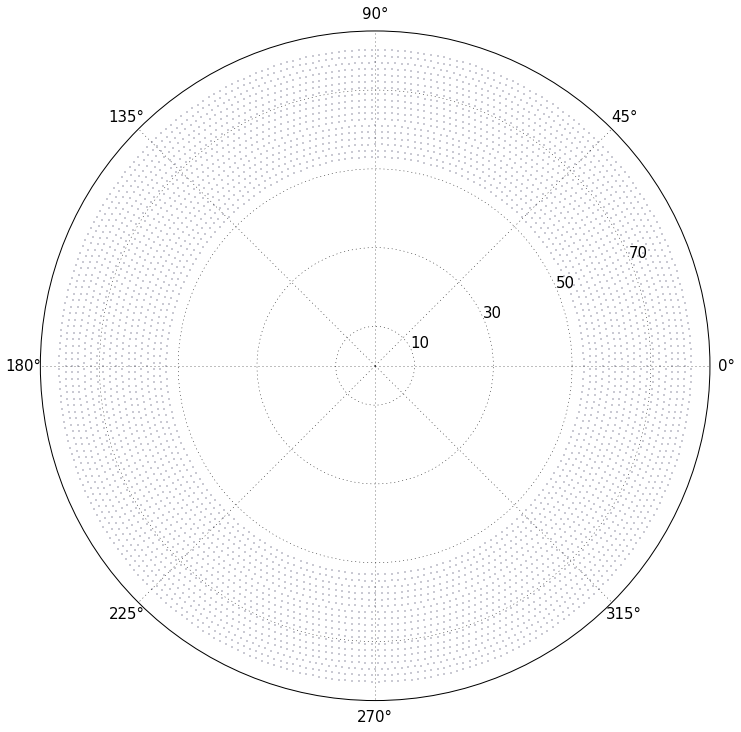

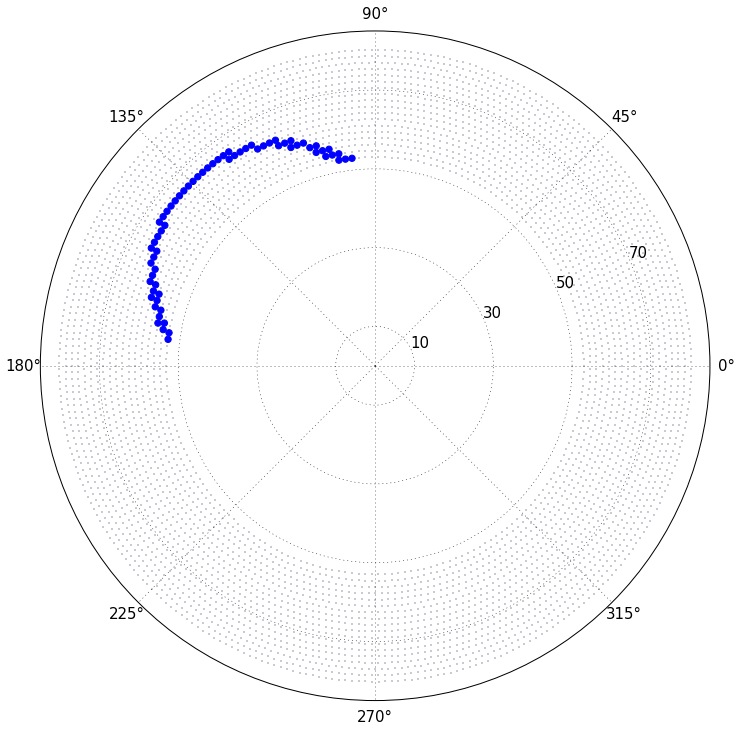

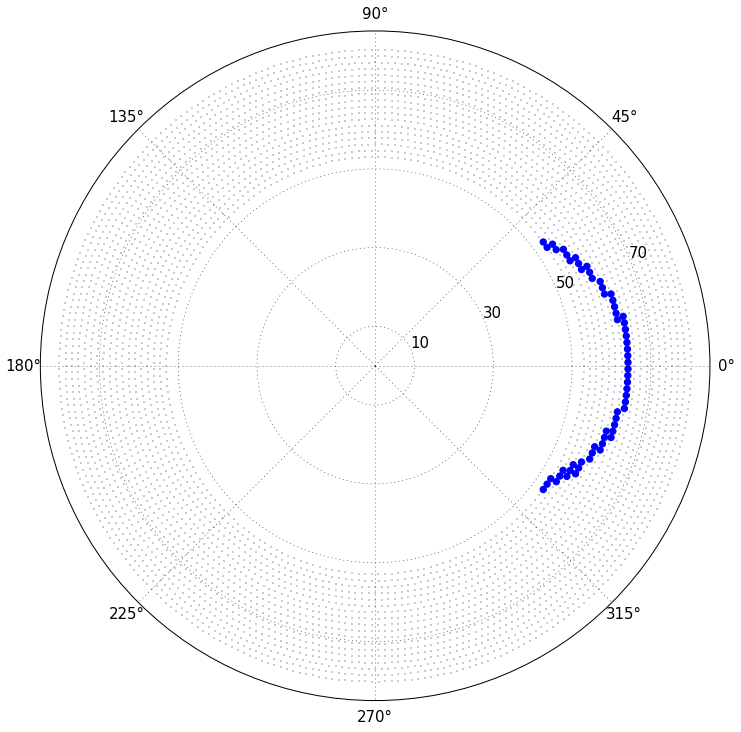

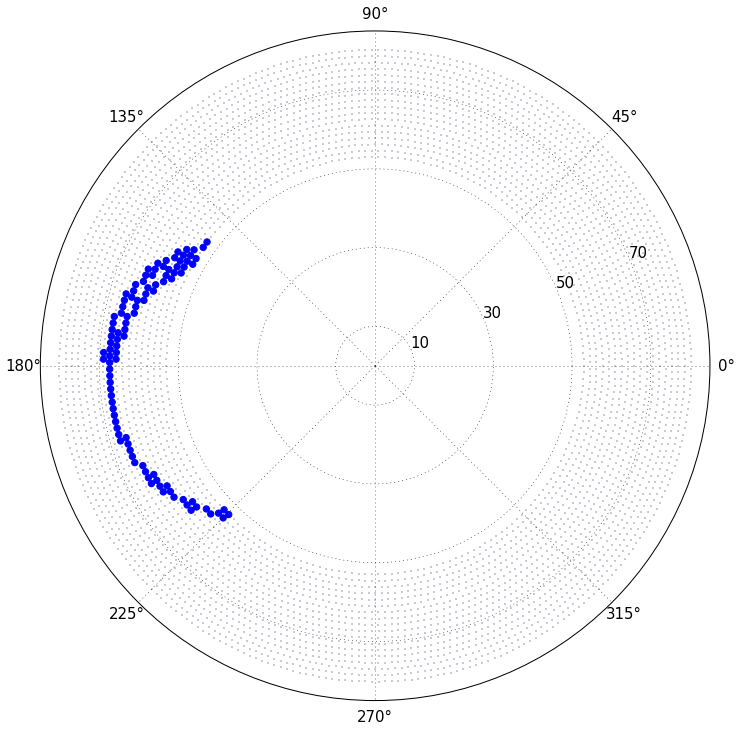

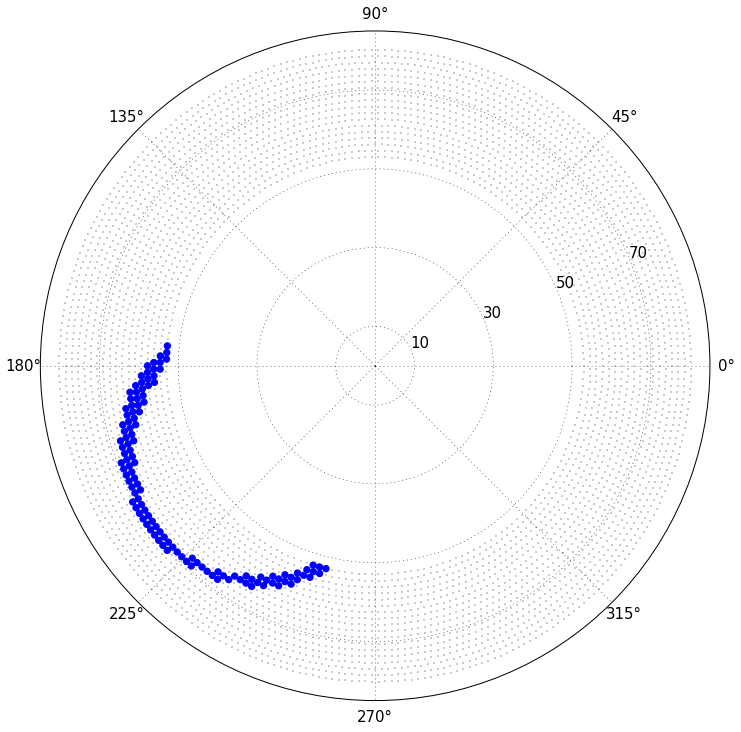

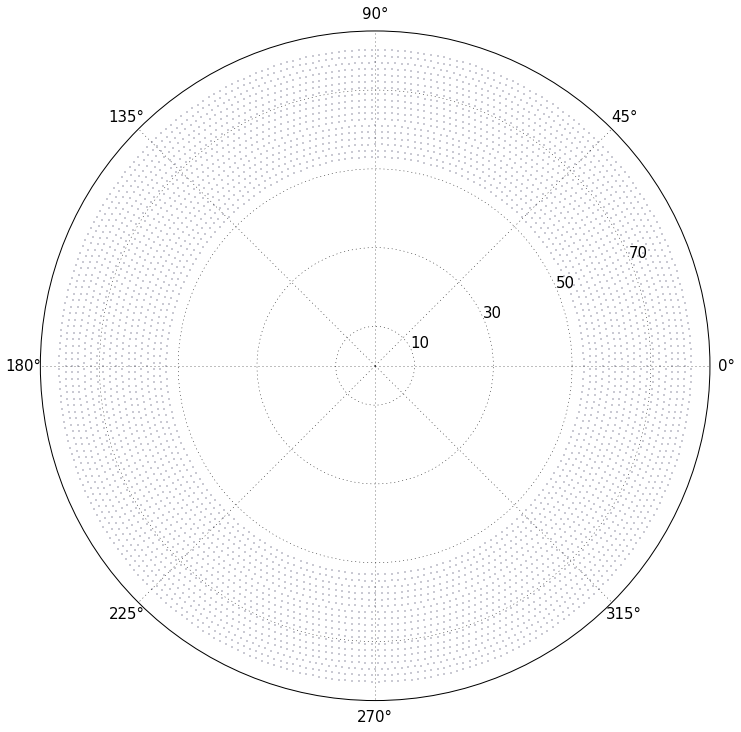

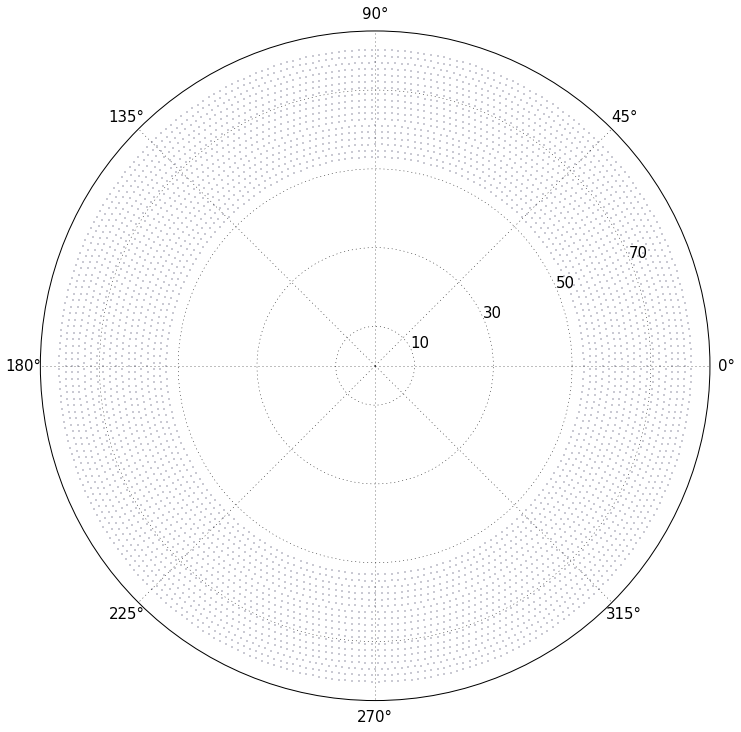

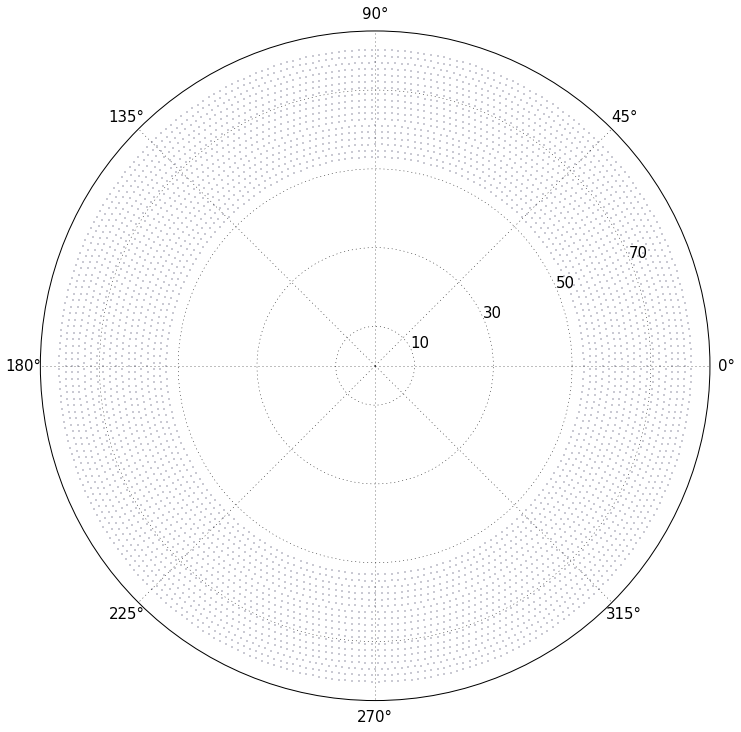

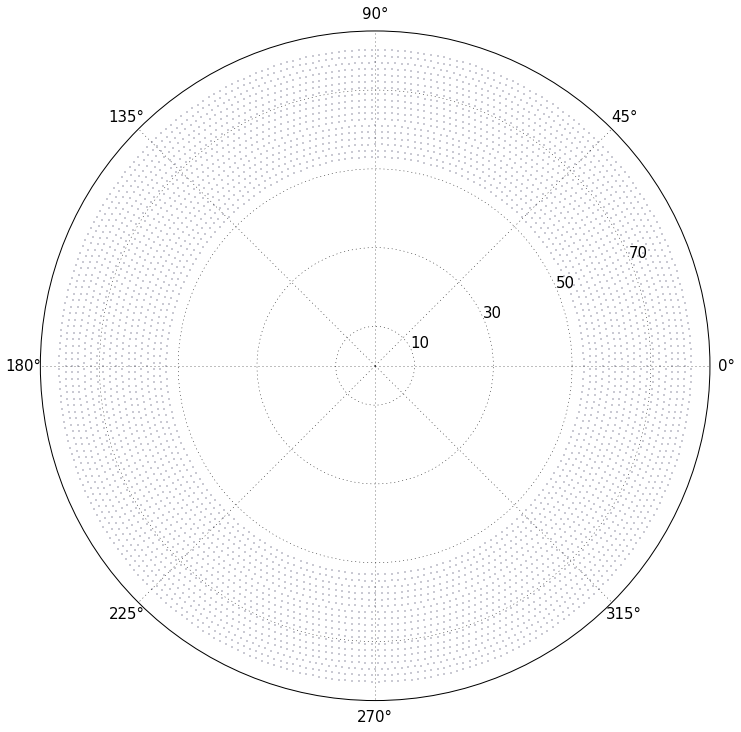

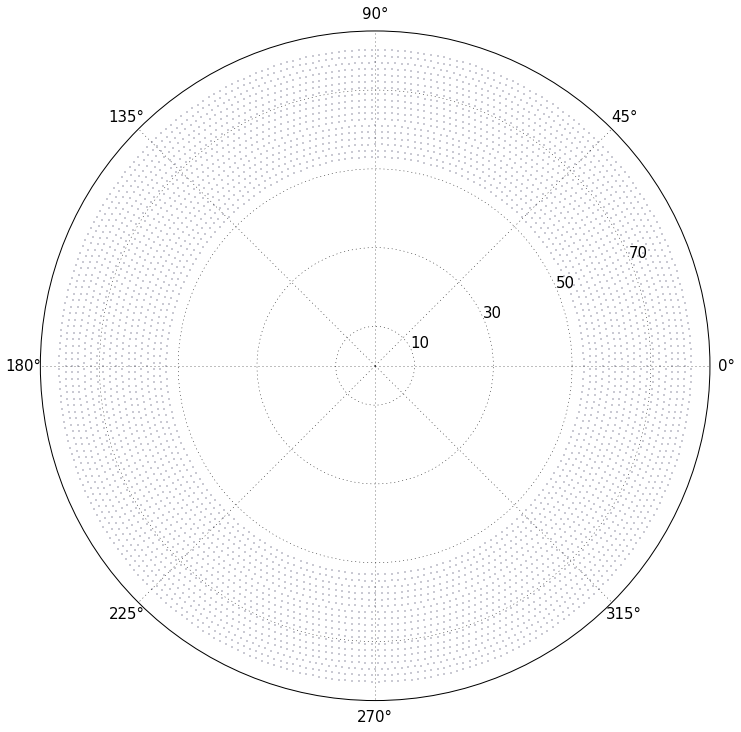

0
Number of Protons 0


In [8]:
# Basic output
dead_wires = [1751, 2249, 2507, 1997]
new_labels = np.zeros(4482)
total_protons = 0
for event in range(10):
    new_labels = labels[event]
    total_protons = rootArray["NProtons"][event]
    new_labels = new_labels != 0
    plot_output(new_labels, hits.cydet)
    show()
print sum(new_labels)
print "Number of Protons {}".format(total_protons)
show()

In [34]:
%run visualizations.ipynb

Populating the interactive namespace from numpy and matplotlib


(array([ 525.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  475.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

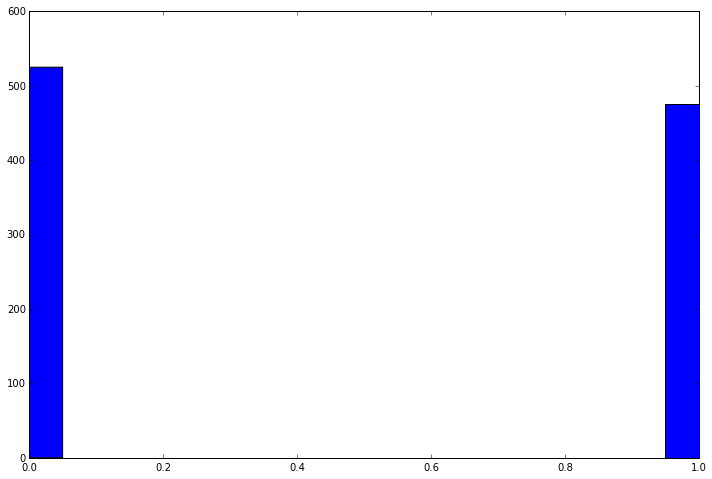

In [35]:
figsize(12,8)
plt.hist(rootArray["NProtons"], bins=20)

In [36]:
print sum(rootArray["NProtons"])

475


In [37]:
sig_hits = AllHits('../data/signal_hits.root', tree="TruthDir/CDC_Hits")
sig_rootArray = root2array('../data/signal_hits.root',treename="TruthDir/CDC_Hits")